In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

from movie_sentiment.ml_logic.vader import model as vadar
from movie_sentiment.processing.scripts import split_movie_script

In [14]:
# Given the parameters for each movie title, calculates the text chunk scores
def movie_raw_score(movie_title):
    
    movie_script_splitted = split_movie_script(movie_title, chunk_type='sentence', \
                                               pad=50, lower=False, rm_stopwords=False, \
                                               lemmatize=False)
    
    movie_script_scored = vadar(movie_script_splitted, 10)
    
    return movie_script_scored['compound']

In [52]:
#moving average
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    moving_avg = np.convolve(data, weights, 'valid')
    return moving_avg

In [53]:
movie_scored = movie_raw_score('Up_1049413.txt')

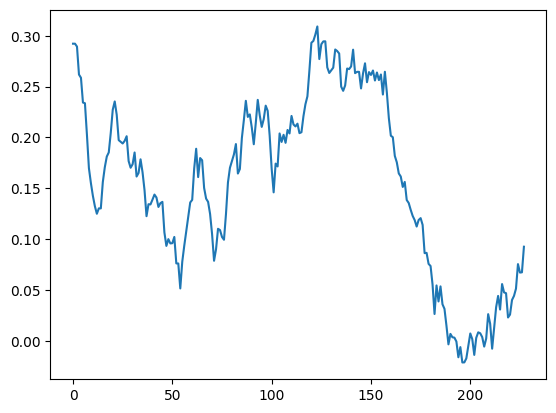

In [73]:
result = moving_average(movie_scored,50)
plt.plot(result)

In [100]:
#new moving average
def new_moving_average(data, window_size):
    size = len(data)
    window_size = 50
    moving_avg = []
    j=0
    #first average
    for i in range(size):
        if i <= window_size:
            weight = np.repeat(1.0, len(data[:i])) / len(data[:i])
            moving_avg.append(np.ma.average(data[:i],weights=weight))
        elif i <= size-window_size:
            weight = np.repeat(1.0, window_size) / window_size
            moving_avg.append(np.ma.average(data[i-window_size:i], weights=weight))
        elif i > size-window_size:
            #second average
            new_window = window_size-j
            weight = np.repeat(1.0, new_window) / new_window
            moving_avg.append(np.ma.average(data[i-new_window:i], weights=weight))
            if j == (window_size-10):
                pass
            else:
                j+=1
    return moving_avg[11:]

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


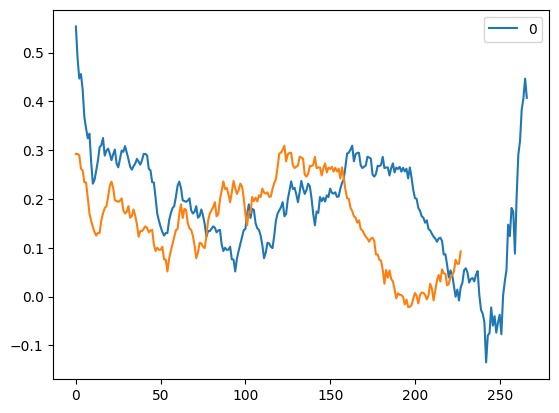

In [98]:
data = movie_scored
size = len(data)
window_size = 50
moving_avg = []
j=0
#first average
for i in range(size):
    if i <= window_size:
        weight = np.repeat(1.0, len(data[:i])) / len(data[:i])
        moving_avg.append(np.ma.average(data[:i],weights=weight))
    elif i <= size-window_size:
        weight = np.repeat(1.0, window_size) / window_size
        moving_avg.append(np.ma.average(data[i-window_size:i], weights=weight))
    elif i > size-window_size:
        #second average
        new_window = window_size-j
        weight = np.repeat(1.0, new_window) / new_window
        moving_avg.append(np.ma.average(data[i-new_window:i], weights=weight))
        if j == 40:
            pass
        else:
            j+=1
pd.DataFrame(moving_avg[10:]).plot()
plt.plot(result)

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


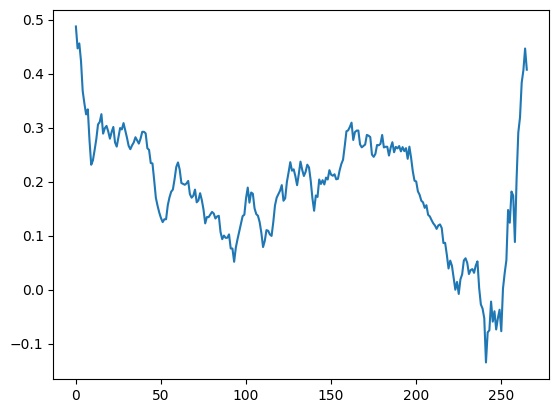

In [103]:
plt.plot(new_moving_average(movie_raw_score('Up_1049413.txt'), 50))

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


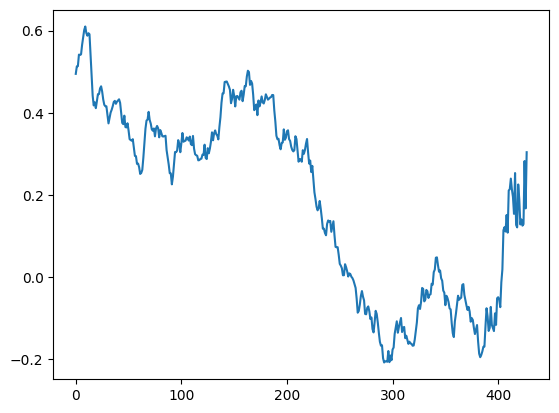

In [104]:
plt.plot(new_moving_average(movie_raw_score('Titanic_0120338.txt'), 50))

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


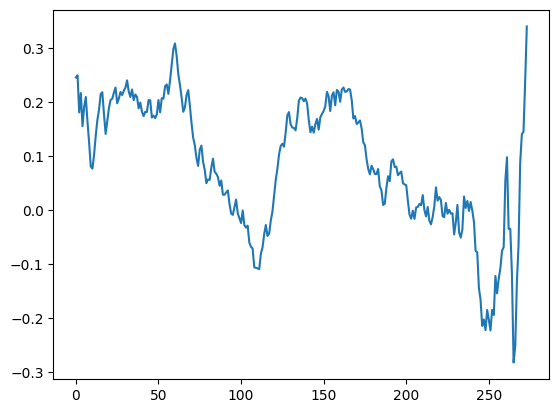

In [105]:
plt.plot(new_moving_average(movie_raw_score('Toy Story_0114709.txt'), 50))

In [1]:
from movie_sentiment.ml_logic.movie_score import movie_score_dyn_avg

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


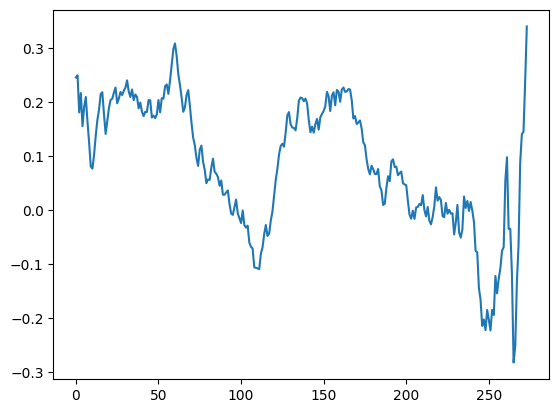

In [5]:
plt.plot(movie_score_dyn_avg('Toy Story_0114709.txt', chunk_type='sentence', pad=50, group_chunk=10, window_size=50))

In [1]:
from movie_sentiment.processing.arcs import generate_all_arcs_new_avg

In [2]:
generate_all_arcs_new_avg()

2/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


3/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


4/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


5/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


6/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


7/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


8/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


9/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


10/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


12/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


13/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


14/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


15/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


16/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


17/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


19/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


20/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


21/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


22/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


23/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


24/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


25/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


26/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


27/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


28/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


29/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


30/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


31/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


32/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


33/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


34/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


35/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


36/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


37/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


39/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


40/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


41/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


42/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


43/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


44/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


45/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


46/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


47/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


48/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


49/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


50/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


51/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


52/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


53/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


54/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


55/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


56/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


57/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


58/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


59/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


60/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


61/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


62/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


63/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


64/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


65/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


66/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


67/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


68/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


69/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


70/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


71/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


72/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


73/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


74/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


75/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


76/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


77/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


78/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


79/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


80/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


81/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


82/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


83/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


84/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


85/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


86/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


87/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


88/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


89/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


90/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


92/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


94/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


95/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


96/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


97/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


98/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


99/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


100/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


101/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


102/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


103/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


105/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


106/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


107/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


108/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


109/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


110/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


111/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


112/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


113/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


114/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


115/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


116/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


118/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


119/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


120/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


121/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


122/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


123/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


124/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


125/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


126/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


127/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


128/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


129/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


130/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


131/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


132/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


133/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


134/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


135/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


136/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


137/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


138/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


139/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


140/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


141/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


142/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


143/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


144/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


145/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


146/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


147/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


148/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


149/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


150/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


151/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


153/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


154/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


155/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


156/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


157/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


158/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


159/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


160/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


161/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


162/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


163/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


164/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


165/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


166/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


167/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


168/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


169/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


170/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


171/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


172/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


173/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


174/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


175/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


176/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


177/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


178/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


179/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


180/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


181/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


182/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


183/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


184/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


185/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


186/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


187/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


188/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


189/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


190/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


191/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


192/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


193/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


194/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


195/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


196/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


197/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


198/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


199/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


200/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


201/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


202/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


203/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


204/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


205/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


206/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


207/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


208/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


209/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


210/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


211/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


212/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


213/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


214/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


215/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


216/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


217/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


218/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


219/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


220/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


221/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


222/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


223/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


224/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


225/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


226/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


227/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


228/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


229/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


230/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


231/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


232/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


233/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


234/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


235/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


236/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


237/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


238/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


239/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


240/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


241/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


242/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


243/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


244/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


245/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


246/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


247/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


248/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


249/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


250/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


251/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


252/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


253/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


254/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


255/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


256/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


257/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


258/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


259/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


260/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


261/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


262/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


263/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


264/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


265/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


266/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


267/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


268/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


269/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


270/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


271/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


272/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


274/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


276/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


277/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


278/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


279/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


280/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


281/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


282/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


283/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


284/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


285/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


286/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


287/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


288/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


289/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


290/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


291/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


292/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


293/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


294/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


296/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


297/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


298/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


299/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


300/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


301/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


302/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


303/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


304/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


305/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


306/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


307/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


308/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


309/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


310/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


311/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


312/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


313/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


314/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


315/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


316/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


317/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


318/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


319/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


320/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


321/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


322/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


323/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


324/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


325/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


327/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


328/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


329/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


330/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


331/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


332/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


333/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


334/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


335/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


337/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


338/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


339/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


340/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


341/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


342/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


344/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


345/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


346/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


347/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


348/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


349/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


350/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


351/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


352/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


353/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


354/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


356/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


357/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


358/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


359/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


360/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


361/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


362/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


363/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


364/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


365/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


366/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


367/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


368/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


369/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


370/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


371/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


372/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


373/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


374/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


375/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


377/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


378/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


379/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


380/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


381/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


382/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


383/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


384/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


385/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


387/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


388/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


389/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


390/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


391/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


392/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


393/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


394/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


395/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


396/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


397/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


398/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


399/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


400/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


401/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


402/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


403/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


404/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


405/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


406/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


407/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


408/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


409/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


410/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


411/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


412/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


413/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


414/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


415/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


416/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


417/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


419/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


420/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


421/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


422/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


423/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


424/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


425/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


426/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


427/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


428/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


429/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


430/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


431/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


432/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


433/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


434/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


435/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


436/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


437/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


438/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


439/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


440/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


441/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


442/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


443/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


444/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


445/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


446/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


447/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


448/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


449/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


450/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


451/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


452/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


453/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


454/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


455/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


456/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


457/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


458/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


459/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


460/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


461/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


462/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


463/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


465/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


466/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


467/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


468/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


469/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


471/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


472/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


473/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


474/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


475/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


476/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


477/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


478/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


479/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


480/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


481/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


482/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


483/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


484/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


485/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


486/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


487/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


488/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


489/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


490/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


491/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


492/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


493/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


494/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


495/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


496/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


497/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


498/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


500/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


501/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


502/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


503/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


504/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


505/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


506/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


507/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


508/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


509/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


511/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


512/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


513/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


514/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


515/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


516/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


517/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


518/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


519/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


520/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


521/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


522/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


523/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


525/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


526/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


527/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


528/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


529/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


531/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


532/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


533/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


534/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


535/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


536/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


537/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


538/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


539/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


540/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


541/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


542/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


543/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


544/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


545/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


546/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


547/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


548/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


549/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


550/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


551/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


552/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


553/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


554/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


555/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


556/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


557/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


558/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


559/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


560/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


561/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


562/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


564/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


565/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


566/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


567/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


568/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


569/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


570/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


571/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


572/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


574/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


575/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


576/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


577/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


578/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


579/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


580/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


582/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


583/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


584/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


585/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


587/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


588/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


589/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


590/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


591/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


592/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


593/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


594/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


595/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


596/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


597/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


598/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


599/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


600/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


601/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


602/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


603/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


604/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


605/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


606/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


607/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


608/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


609/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


610/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


611/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


612/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


613/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


614/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


615/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


616/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


617/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


618/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


619/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


620/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


621/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


622/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


623/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


624/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


625/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


626/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


627/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


628/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


629/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


630/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


631/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


632/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


633/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


634/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


635/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


636/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


637/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


638/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


639/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


640/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


641/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


642/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


643/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


644/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


645/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


646/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


647/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


648/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


649/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


650/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


651/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


653/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


654/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


655/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


656/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


657/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


658/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


659/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


660/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


661/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


662/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


663/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


664/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


665/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


666/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


667/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


668/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


669/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


670/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


672/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


673/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


674/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


675/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


676/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


677/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


678/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


679/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


680/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


681/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


682/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


683/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


684/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


685/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


686/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


687/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


688/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


689/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


690/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


691/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


692/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


693/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


694/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


695/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


696/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


697/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


698/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


699/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


700/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


701/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


703/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


704/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


705/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


706/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


707/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


708/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


709/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


710/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


711/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


712/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


713/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


714/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


715/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


716/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


717/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


718/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


719/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


720/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


721/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


722/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


723/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


724/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


725/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


726/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


727/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


728/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


729/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


730/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


731/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


732/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


733/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


734/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


735/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


737/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


738/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


739/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


740/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


741/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


742/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


743/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


744/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


745/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


747/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


748/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


749/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


750/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


751/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


752/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


753/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


754/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


755/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


756/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


757/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


758/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


759/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


760/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


761/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


762/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


763/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


764/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


765/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


767/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


768/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


769/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


770/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


772/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


773/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


774/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


775/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


776/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


777/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


778/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


779/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


781/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


782/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


783/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


784/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


785/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


786/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


787/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


788/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


789/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


790/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


791/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


792/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


793/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


794/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


795/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


796/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


797/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


798/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


799/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


800/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


801/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


802/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


803/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


804/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


805/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


806/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


807/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


808/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


809/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


810/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


811/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


812/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


813/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


814/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


815/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


816/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


817/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


818/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


819/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


820/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


821/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


822/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


823/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


824/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


825/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


826/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


827/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


828/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


829/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


830/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


831/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


832/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


833/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


834/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


835/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


836/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


837/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


838/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


839/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


840/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


841/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


842/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


843/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


844/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


845/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


846/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


847/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


848/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


849/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


850/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


851/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


852/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


853/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


854/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


855/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


856/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


857/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


858/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


859/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


860/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


861/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


862/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


863/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


864/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


865/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


866/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


867/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


868/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


869/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


870/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


871/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


872/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


873/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


874/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


875/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


876/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


877/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


878/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


879/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


880/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


881/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


882/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


883/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


884/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


885/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


886/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


887/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


888/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


889/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


890/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


891/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


892/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


893/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


894/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


895/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


896/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


897/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


898/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


899/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


900/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


901/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


902/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


903/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


904/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


905/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


906/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


907/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


908/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


909/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


910/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


911/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


912/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


913/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


914/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


915/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


916/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


917/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


918/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


919/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


921/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


922/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


923/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


924/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


925/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


926/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


927/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


928/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


929/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


930/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


931/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


932/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


933/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


934/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


935/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


936/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


937/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


938/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


939/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


940/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


941/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


942/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


944/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


945/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


947/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


948/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


949/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


950/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


951/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


952/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


953/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


954/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


955/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


956/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


957/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


958/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


960/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


961/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


962/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


963/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


964/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


965/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


966/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


967/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


968/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


969/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


970/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


971/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


972/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


973/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


974/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


975/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


976/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


977/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


978/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


979/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


980/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


982/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


983/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


984/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


985/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


986/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


987/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


989/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


990/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


991/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


992/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


993/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


994/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


995/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


996/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


997/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


998/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


999/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1000/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1001/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1002/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1003/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1004/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1006/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1007/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1008/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1009/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1010/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1011/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1012/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1013/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1014/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1015/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1016/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1017/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1018/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1019/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1020/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1021/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1022/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1023/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1024/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1025/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1026/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1027/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1028/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1029/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1030/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1031/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1032/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1033/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1034/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1035/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1036/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1037/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1038/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1039/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1040/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1041/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1042/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1043/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1044/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1045/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1046/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1047/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1048/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1049/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1050/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1051/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1053/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1054/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1055/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1056/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1057/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1058/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1059/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1060/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1061/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1062/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1063/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1064/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1065/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1066/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1067/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1068/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1069/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1070/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1072/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1073/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1074/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1075/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1077/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1078/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1079/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1080/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1081/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1082/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1083/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1085/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1086/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1088/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1089/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1090/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1091/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1092/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1093/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1094/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1095/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1096/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1097/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1098/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1099/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1100/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1101/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1102/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1103/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1104/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1105/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1106/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1107/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1108/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1109/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1110/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1111/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1112/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1113/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1114/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1115/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1116/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1117/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1118/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1119/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1120/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1121/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1122/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1123/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1124/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1125/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1126/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1127/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1128/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1129/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1130/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1131/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1132/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1133/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1134/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1135/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1136/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1137/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1138/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1139/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1140/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1141/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1142/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1143/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1144/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1145/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1146/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1147/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1148/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1149/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1150/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1151/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1152/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1153/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1154/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1155/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1156/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1157/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1158/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1159/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1160/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1161/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1162/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1163/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1164/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1165/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1166/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1167/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1168/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1169/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1170/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1172/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1173/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1174/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1175/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1176/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1177/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1178/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1179/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1181/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1182/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1183/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1184/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1185/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1186/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1187/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1188/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1189/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1190/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1191/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1192/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1193/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1194/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1195/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1196/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1197/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1198/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1199/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1200/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1201/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1202/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1203/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1204/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1205/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1206/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1207/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1208/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1209/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1210/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1211/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1212/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1213/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1214/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1216/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1217/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1218/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1219/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1220/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1221/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1222/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1223/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1224/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1225/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1226/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1227/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1228/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1229/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1230/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1231/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1232/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1233/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1234/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1235/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1236/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1237/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1238/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1239/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1240/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1241/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1242/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1243/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1244/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1245/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1246/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1247/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1248/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1249/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1250/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1251/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1252/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1253/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1255/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1256/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1257/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1258/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1259/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1260/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1261/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1262/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1263/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1264/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1265/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1266/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1267/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1268/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1269/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1271/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1272/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1273/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1274/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1275/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1276/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1277/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1278/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1279/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1280/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1281/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1282/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1283/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1284/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1285/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1286/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1287/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1288/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1289/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1290/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1292/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1293/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1294/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1295/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1296/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1297/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1298/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1299/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1300/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1301/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1302/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1303/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1304/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1305/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1306/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1307/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1308/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1309/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1310/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1311/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1312/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1313/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1314/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1315/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1316/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1317/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1318/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1319/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1320/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1321/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1322/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1323/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1324/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1325/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1326/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1327/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1328/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1329/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1330/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1331/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1332/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1333/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1334/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1335/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1336/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1337/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1338/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1339/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1340/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1341/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1342/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1343/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1344/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1345/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1346/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1347/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1348/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1349/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1350/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1351/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1352/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1353/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1354/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1355/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1356/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1357/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1358/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1359/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1360/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1361/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1362/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1363/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1364/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1365/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1366/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1367/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1368/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1369/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1370/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1371/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1372/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1373/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1374/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1375/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1376/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1377/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1378/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1379/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1380/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1381/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1382/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1383/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1384/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1385/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1386/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1387/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1388/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1389/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1390/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1391/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1392/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1393/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1394/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1395/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1396/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1397/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1398/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1399/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1400/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1401/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1402/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1403/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1404/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1405/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1406/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1407/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1408/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1409/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1410/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1411/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1412/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1413/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1414/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1415/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1416/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1417/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1418/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1419/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1420/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1421/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1422/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1423/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1424/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1425/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1426/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1427/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1428/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1429/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1430/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1431/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1432/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1433/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1434/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1435/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1436/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1437/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1438/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1439/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1440/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1441/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1442/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1444/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1445/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1446/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1447/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1448/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1449/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1450/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1451/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1452/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1453/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1454/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1455/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1456/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1457/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1458/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1459/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1460/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1461/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1462/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1463/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1464/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1465/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1466/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1467/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1468/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1469/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1470/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1471/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1472/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1473/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1474/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1475/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1476/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1477/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1478/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1479/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1480/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1482/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1483/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1484/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1485/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1486/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1487/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1489/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1491/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1493/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1494/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1495/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1496/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1497/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1498/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1499/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1500/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1501/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1502/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1503/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1504/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1505/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1506/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1507/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1508/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1509/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1510/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1511/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1512/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1513/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1514/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1515/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1516/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1517/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1518/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1519/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1520/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1521/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1522/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1524/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1525/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1526/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1527/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1528/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1529/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1530/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1531/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1532/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1533/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1534/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1535/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1536/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1537/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1538/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1539/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1540/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1541/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1542/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1543/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1544/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1545/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1546/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1547/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1548/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1549/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1550/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1551/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1552/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1553/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1554/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1555/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1556/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1557/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1558/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1559/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1560/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1561/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1562/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1563/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1564/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1565/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1566/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1567/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1568/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1569/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1570/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1571/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1572/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1573/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1574/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1575/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1576/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1577/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1578/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1579/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1580/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1581/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1582/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1583/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1584/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1585/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1586/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1587/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1588/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1589/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1590/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1591/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1592/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1593/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1594/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1595/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1596/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1597/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1598/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1599/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1600/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1601/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1602/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1603/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1604/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1605/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1606/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1607/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1608/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1609/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1610/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1611/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1612/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1613/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1614/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1615/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1616/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1617/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1618/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1619/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1620/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1622/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1623/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1624/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1625/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1626/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1627/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1628/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1629/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1630/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1631/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1633/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1634/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1635/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1636/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1637/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1638/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1639/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1641/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1642/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1643/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1644/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1645/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1647/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1648/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1649/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1650/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1652/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1653/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1654/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1655/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1656/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1657/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1658/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1660/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1661/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1662/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1663/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1664/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1665/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1667/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1668/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1669/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1670/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1671/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1672/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1673/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1674/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1675/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1676/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1677/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1678/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1679/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1680/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1681/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1682/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1683/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1684/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1685/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1686/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1687/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1688/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1689/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1690/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1691/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1692/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1693/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1694/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1695/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1696/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1697/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1698/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1699/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1700/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1701/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1702/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1703/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1704/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1705/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1706/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1708/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1709/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1710/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1711/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1712/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1713/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1714/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1715/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1716/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1718/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1720/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1721/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1722/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1723/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1724/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1725/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1726/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1727/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1728/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1729/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1730/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1731/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1732/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1733/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1734/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1735/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1736/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1737/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1738/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1739/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1740/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1741/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1742/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1743/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1744/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1745/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1746/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1747/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1748/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1750/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1751/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1752/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1753/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1754/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1755/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1756/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1757/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1758/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1759/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1760/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1761/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1762/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1763/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1764/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1765/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1766/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1767/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1768/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1769/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1770/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1772/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1773/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1774/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1775/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1776/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1777/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1778/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1779/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1780/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1781/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1782/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1783/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1784/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1785/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1786/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1787/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1788/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1789/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1790/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1791/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1792/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1793/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1794/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1795/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1797/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1798/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1799/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1800/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1801/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1802/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1803/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1804/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1806/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1807/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1808/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1809/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1810/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1811/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1812/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1813/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1814/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1815/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1816/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1817/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1818/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1819/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1820/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1821/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1822/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1823/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1824/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1825/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1826/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1827/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1828/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1829/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1830/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1831/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1832/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1833/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1834/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1836/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1837/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1838/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1839/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1840/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1841/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1842/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1843/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1844/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1845/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1846/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1847/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1848/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1849/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1850/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1851/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1852/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1853/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1854/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1855/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1856/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1857/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1858/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1859/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1860/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1861/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1863/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1864/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1865/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1866/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1867/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1868/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1869/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1870/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1871/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1872/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1873/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1874/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1875/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1876/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1877/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1878/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1879/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1880/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1881/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1882/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1883/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1884/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1885/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1886/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1887/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1888/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1889/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1890/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1891/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1892/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1893/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1894/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1895/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1896/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1897/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1898/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1899/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1900/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1901/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1902/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1903/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1904/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1905/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1906/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1907/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1908/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1909/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1910/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1911/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1912/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1913/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1914/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1915/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1916/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1917/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1918/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1919/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1920/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1921/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1922/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1923/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1924/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1925/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1926/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1927/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1928/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1929/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1930/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1931/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1932/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1933/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1934/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1935/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1936/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1937/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1938/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1939/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1940/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1941/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1942/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1943/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1944/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1945/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1946/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1947/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1948/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1949/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1950/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1951/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1952/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1953/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1954/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1955/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1956/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1957/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1958/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1959/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1960/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1961/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1962/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1963/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1964/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1965/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1966/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1967/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1968/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1969/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1970/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1971/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1972/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1973/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1974/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1975/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1976/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1977/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1978/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1979/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1980/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1981/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1982/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1983/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1984/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1985/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1986/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1987/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1988/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1989/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1990/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1991/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1992/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1993/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1994/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1995/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1996/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1997/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1998/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


1999/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2000/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2001/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2002/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2003/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2004/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2005/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2006/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2007/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2008/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2009/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2010/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2011/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2012/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2013/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2014/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2015/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2016/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2017/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2018/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2019/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2020/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2021/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2022/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2023/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2024/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2025/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2026/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2027/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2028/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2029/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2030/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2031/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2032/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2033/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2034/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2035/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2036/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2037/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2038/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2039/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2040/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2041/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2042/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2043/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2044/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2045/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2046/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2047/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2048/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2049/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2050/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2051/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2052/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2053/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2054/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2055/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2056/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2057/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2058/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2059/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2060/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2062/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2063/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2064/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2065/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2066/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2067/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2069/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2070/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2071/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2072/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2073/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2074/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2075/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2076/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2077/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2078/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2079/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2080/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2081/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2082/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2083/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2085/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2086/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2087/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2088/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2089/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2090/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2091/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2092/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2093/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2094/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2095/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2096/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2097/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2098/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2099/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2100/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2101/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2102/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2103/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2104/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2105/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2106/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2107/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2108/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2109/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2110/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2111/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2112/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2113/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2115/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2116/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2117/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2118/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2119/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2120/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2121/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2122/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2123/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2124/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2125/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2126/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2127/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2128/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2129/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2130/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2131/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2132/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2133/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2134/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2135/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2136/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2137/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2138/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2139/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2140/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2141/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2142/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2143/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2144/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2145/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2146/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2147/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2148/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2149/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2150/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2152/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2153/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2154/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2155/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2156/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2157/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2158/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2159/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2160/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2161/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2163/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2164/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2165/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2166/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2167/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2168/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2169/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2170/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2171/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2172/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2173/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2174/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2175/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2176/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2177/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2178/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2179/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2180/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2181/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2182/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2183/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2184/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2185/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2186/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2187/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2188/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2189/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2190/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2191/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2192/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2193/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2194/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2195/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2196/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2197/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2198/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2199/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2200/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2201/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2202/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2203/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2204/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2205/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2206/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2207/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2208/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2209/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2210/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2211/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2212/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2213/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2214/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2215/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2216/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2217/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2219/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2220/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2221/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2222/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2223/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2224/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2225/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2226/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2227/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2228/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2229/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2230/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2231/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2233/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2234/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2235/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2236/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2237/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2238/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2239/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2240/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2241/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2243/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2244/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2245/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2246/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2247/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2248/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2249/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2250/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2251/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2252/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2254/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2255/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2256/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2257/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2258/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2259/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2260/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2261/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2262/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2263/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2264/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2265/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2266/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2267/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2268/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2269/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2270/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2271/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2272/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2273/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2274/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2276/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2277/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2278/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2279/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2280/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2281/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2282/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2283/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2284/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2285/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2286/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2287/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2288/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2289/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2290/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2291/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2292/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2293/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2294/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2295/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2296/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2297/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2298/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2299/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2300/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2301/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2302/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2304/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2305/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2306/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2307/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2308/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2309/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2310/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2311/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2312/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2313/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2314/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2316/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2317/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2318/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2319/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2320/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2321/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2322/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2323/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2324/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2325/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2326/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2327/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2328/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2329/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2330/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2331/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2332/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2333/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2334/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2335/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2336/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2337/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2338/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2339/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2340/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2341/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2342/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2343/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2344/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2345/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2346/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2347/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2348/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2349/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2350/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2351/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2353/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2354/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2355/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2356/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2357/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2358/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2359/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2361/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2362/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2363/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2364/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2366/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2367/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2368/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2369/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2370/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2371/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2372/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2373/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2374/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2375/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2376/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2377/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2378/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2380/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2381/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2382/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2383/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2384/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2385/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2386/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2387/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2388/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2389/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2390/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2391/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2392/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2393/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2394/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2395/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2396/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2397/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2398/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2399/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2400/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2401/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2402/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2403/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2404/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2405/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2406/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2407/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2408/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2409/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2410/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2411/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2412/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2413/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2414/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2415/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2416/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2417/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2418/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2419/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2420/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2421/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2422/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2423/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2424/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2425/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2426/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2427/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2428/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2430/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2431/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2432/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2433/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2434/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2435/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2436/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2437/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2438/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2439/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2440/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2442/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2443/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2444/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2446/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2447/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2448/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2449/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2450/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2451/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2452/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2453/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2454/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2455/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2456/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2458/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2459/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2460/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2461/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2462/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2463/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2464/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2465/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2466/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2467/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2468/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2469/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2470/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2471/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2472/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2473/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2474/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2475/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2476/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2477/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2478/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2479/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2482/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2483/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2484/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2485/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2486/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2487/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2488/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2489/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2490/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2491/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2492/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2493/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2494/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2495/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2496/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2497/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2498/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2499/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2500/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2501/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2502/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2503/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2504/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2505/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2506/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2507/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2508/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2510/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2511/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2512/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2513/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2514/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2515/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2516/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2517/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2518/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2519/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2520/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2521/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2522/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2523/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2524/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2525/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2526/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2527/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2528/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2529/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2530/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2531/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2532/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2533/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2534/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2535/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2536/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2537/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2538/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2539/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2540/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2541/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2542/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2543/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2544/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2545/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2547/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2548/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2549/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2550/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2551/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2552/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2553/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2554/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2555/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2556/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2558/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2559/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2560/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2561/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2562/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2563/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2564/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2565/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2566/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2567/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2568/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2569/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2570/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2571/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2572/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2573/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2574/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2575/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2577/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2578/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2579/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2580/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2581/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2582/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2583/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2584/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2585/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2586/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2587/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2588/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2589/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2590/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2591/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2592/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2593/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2594/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2595/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2596/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2597/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2598/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2600/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2601/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2602/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2603/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2604/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2605/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2606/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2607/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2608/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2609/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2610/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2611/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2612/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2613/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2614/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2615/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2616/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2617/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2618/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2619/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2620/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2621/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2622/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2623/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2624/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2625/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2626/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2627/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2628/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2629/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2630/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2631/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2632/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2633/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2635/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2636/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2637/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2638/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2639/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2640/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2641/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2642/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2643/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2644/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2645/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2647/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2648/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2649/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2651/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2652/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2653/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2654/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2655/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2656/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2657/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2658/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2659/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2660/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2661/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2662/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2664/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2665/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2666/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2667/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2668/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2670/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2671/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2672/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2673/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2674/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2675/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2676/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2677/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2678/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2679/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2680/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2681/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2682/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2684/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2685/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2686/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2687/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2688/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2689/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2690/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2691/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2692/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2693/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2694/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2695/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2696/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2697/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2698/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2699/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2700/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2701/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2702/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2703/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2704/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2705/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2706/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2707/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2708/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2709/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2710/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2711/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2712/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2713/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2714/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2715/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2716/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2717/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2718/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2719/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2720/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2721/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2722/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2723/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2724/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2725/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2726/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2727/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2728/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2729/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2730/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2731/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2732/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2733/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2734/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2735/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2736/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2737/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2738/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2739/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2740/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2741/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2742/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2743/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2744/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2745/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2746/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2747/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2748/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2749/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2750/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2751/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2752/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2753/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2755/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2756/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2757/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2758/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2759/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2760/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2761/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2762/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2763/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2764/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2765/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2766/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2767/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2768/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2769/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2770/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2771/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2772/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2773/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2775/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2776/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2777/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2778/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2779/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2780/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2781/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2782/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2783/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2784/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2785/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2786/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2787/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2788/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2789/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2790/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2791/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2792/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2793/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2794/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2795/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2797/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2798/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2799/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2800/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2801/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2802/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2803/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2804/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2805/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2806/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2807/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2808/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2809/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2810/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2811/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2812/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2814/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2815/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2816/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2817/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2818/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2819/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2820/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2821/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2822/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2823/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2824/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2825/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2826/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2827/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2828/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2829/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2830/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2831/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2832/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2833/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2834/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2835/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2836/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2837/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2838/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2840/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2841/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2842/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2843/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2844/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2845/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2846/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2847/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2848/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2849/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2850/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2851/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2853/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2854/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2856/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2857/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


2858/2858 movies arcs generated

/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,
/home/alemedeiros_/.pyenv/versions/3.10.6/envs/movie-sentiment-analysis/lib/python3.10/site-packages/numpy/ma/extras.py:649: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


Saving in pickle file
Saved in pickle file


{'Fernando Arrabal lit Sa corolle noire ditions A Biren suivi de Ah la belle ann e ditions Ginasservis et Paris': [0.003509090909090948,
  0.061574999999999984,
  -0.008692307692307702,
  -0.07160000000000001,
  -0.06301333333333334,
  -0.11890000000000003,
  -0.1685764705882353,
  -0.16064444444444445,
  -0.12014210526315794,
  -0.12487500000000001,
  -0.15639047619047616,
  -0.11090909090909093,
  -0.06677391304347831,
  -0.03138333333333334,
  -0.06669999999999998,
  -0.08205769230769233,
  -0.0988777777777778,
  -0.12730357142857143,
  -0.11239310344827588,
  -0.11291333333333335,
  -0.07931935483870972,
  -0.06648749999999999,
  -0.06224545454545455,
  -0.07365294117647059,
  -0.053105714285714305,
  -0.02593055555555556,
  -0.019500000000000003,
  -0.03826578947368423,
  -0.060507692307692325,
  -0.05108500000000001,
  -0.030629268292682935,
  -0.019449999999999995,
  -0.03167441860465117,
  -0.05260000000000001,
  -0.05987999999999998,
  -0.05238043478260871,
  -0.06361276595744